In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [70]:
df = pd.read_csv('transfusion.csv')

In [71]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


R (Recency - months since last donation)
F (Frequency - total number of donation)
M (Monetary - total blood donated in c.c.)
T (Time - months since first donation)
A binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood)

Renombrando columnas con el fin de acceder a ellas más fácilmente

In [72]:
df.rename(columns={'Recency (months)':'Recency','Frequency (times)':'Frecuency', 'Monetary (c.c. blood)':'BloodMonValue', 'Time (months)':'Time', 'whether he/she donated blood in March 2007':'donated'}, inplace=True)
df.head()

,Recency,Frecuency,BloodMonValue,Time,donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Vamos a revisar si en el dataset existe un dato nulo

In [73]:
df.isnull().sum()

Recency          0
Frecuency        0
BloodMonValue    0
Time             0
donated          0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        748 non-null    int64
 1   Frecuency      748 non-null    int64
 2   BloodMonValue  748 non-null    int64
 3   Time           748 non-null    int64
 4   donated        748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [75]:
df.describe()

,Recency,Frecuency,BloodMonValue,Time,donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Vamos a ver la correlación que existe entre variables

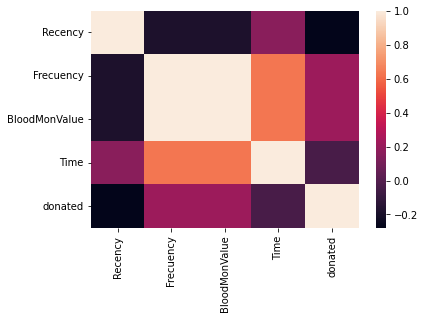

In [76]:
sns.heatmap(df.corr())

Ahora vamos a separar las propiedades de la etiqueta, para su posterior entrenamiento

In [77]:
x_data = df.drop('donated', axis = 1)
x_data.head()

,Recency,Frecuency,BloodMonValue,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [78]:
y_data = df['donated']
y_data.head()

0    1
1    1
2    1
3    1
4    0
Name: donated, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.6)

Creamos el algoritmo encargado de entrenar del modelo seleccionado.

In [80]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):  
    results = {}
    
    # Ajustar al alumno a los datos de entrenamiento usando cortes con 'sample_size'
    start = time() # Obtener hora de inicio
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Obtener hora de termino
    
    # Calcular el tiempo de entrenamiento
    results['train_time'] = end - start
        
    start = time() # Obtener hora de inicio
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Obtener hora de termino
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
   # Calcular la precisión en el conjunto de prueba
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300],predictions_train, beta=0.5)
        
    results['f_test'] = fbeta_score(y_test,predictions_test, beta = 0.5)
       
    # Éxito
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

Se importan los modelos a utilizar en la práctica.

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf_A = AdaBoostClassifier()
clf_B = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True)
clf_C = RandomForestClassifier(n_estimators=10, max_features='sqrt', bootstrap=True, oob_score=False)
clf_D = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, validation_fraction=0.1,tol=0.0001, )


results = {}

for clf in [clf_A, clf_B, clf_C, clf_D]:
  clf_name = clf.__class__.__name__
  results[clf_name] = {}
  train_predict(clf, len(y_data), x_train, y_train, x_test, y_test)
  
#classifier= RandomForestClassifier(n_estimators= 10)  
#classifier.fit(x_train, y_train) 

AdaBoostClassifier trained on 748 samples.
BaggingClassifier trained on 748 samples.
RandomForestClassifier trained on 748 samples.
GradientBoostingClassifier trained on 748 samples.


Realizamos la matriz de confusión para observar la precisión de los distintos modelos

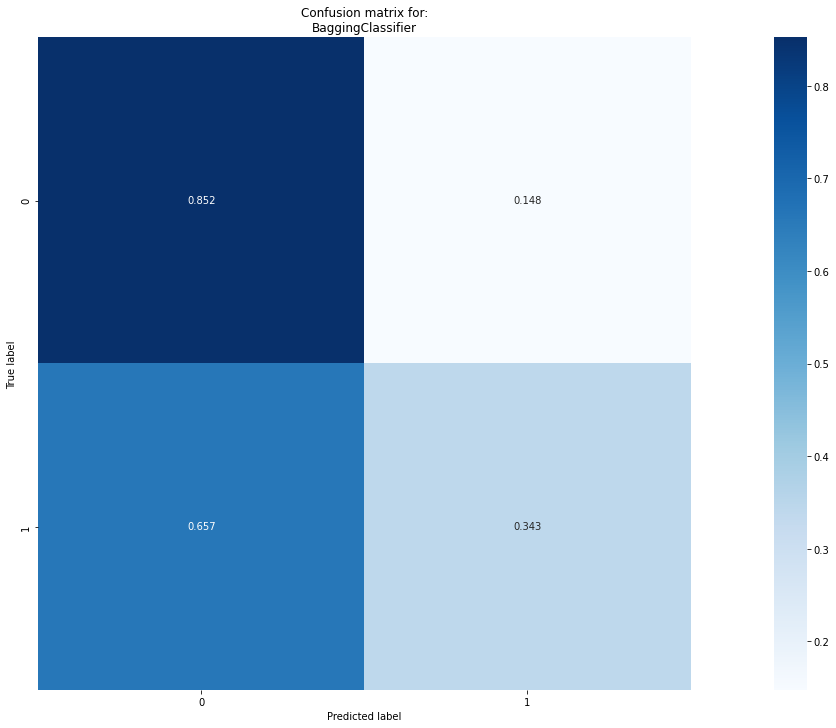

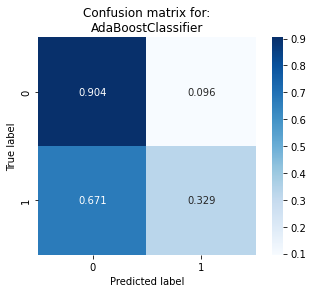

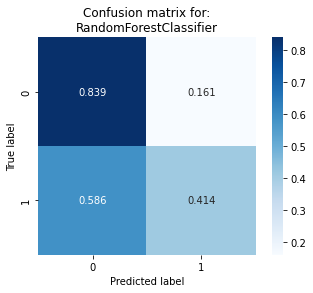

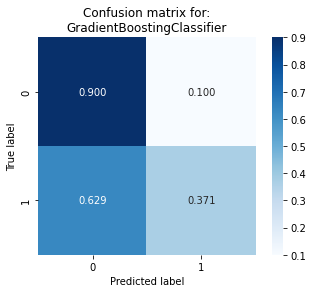

In [82]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(30,12))

for i,model in enumerate([clf_A,clf_B,clf_C,clf_D]):
    cm = confusion_matrix(y_test, model.predict(x_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalizar los datos

    # ver con un heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":10}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

Calculamos el score individual de cada modelo

In [83]:
model = AdaBoostClassifier().fit(x_train,y_train)

importances = model.score(x_train,y_train)
importances

0.8169642857142857

In [84]:
model2 = BaggingClassifier().fit(x_train,y_train)

importances2 = model2.score(x_train,y_train)
importances2

0.921875

In [85]:
model3 = RandomForestClassifier().fit(x_train,y_train)

importances3 = model3.score(x_train,y_train)
importances3

0.9486607142857143

In [86]:
model4 = GradientBoostingClassifier().fit(x_train,y_train)

importances4 = model4.score(x_train,y_train)
importances4

0.859375

Como se puede observar, randomForest fue el modelo más preciso, con un valor de 94%, por lo que lo utilizaremos para predecir con unos ejemplos, si personas con ciertas características donarán o no.

In [87]:
data = [[1,16,4000,35]]
x_new = pd.DataFrame(data, columns=['Recency','Frecuency', 'BloodMonValue', 'Time'])
print(model3.predict(x_new))

[1]


In [88]:
data = [[4,1,24,6000]]
x_new = pd.DataFrame(data, columns=['Recency','Frecuency', 'BloodMonValue', 'Time'])
print(model3.predict(x_new))

[0]


In [89]:
data = [[2,1,16,4000]]
x_new = pd.DataFrame(data, columns=['Recency','Frecuency', 'BloodMonValue', 'Time'])
print(model3.predict(x_new))

[0]
